# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
appdf = pd.read_csv('googleplaystore.csv')
appdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# App = Nama Aplikasi
# Category = Kelas/divisi yang menggabungkan aplikasi dengan ciri-ciri yang sama
# Rating = Overall ulasan pengguna (out of 5)
# Reviews = Jumlah ulasan yang diterima aplikasi saat di scrape
# Type = Apakah aplikasi berbayar atau gratis
# Installs = Jumlah pengunduhan total dari waktu rilis hingga waktu di-scrape
# Content Rating = Age Group yang ditarget berdasarkan konten
# Genre = Tema general yang disajikan konten aplikasi tersebut
# Current Ver = Versi aplikasi ketika di-scrape
# Android Ver = Minimum OS untuk bisa me-run aplikasi tersebut

In [4]:
appdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
appdf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data Cleaning

### 1. Missing Data Study

In [6]:
appdf.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

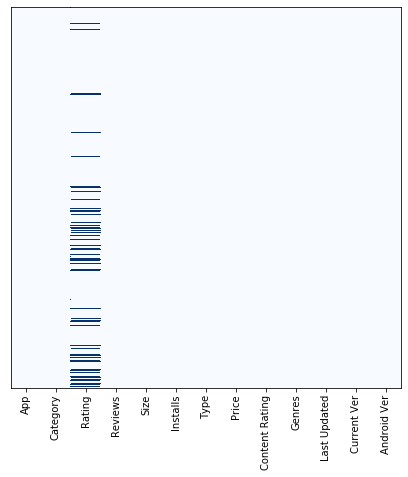

In [7]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(appdf.isnull(), yticklabels=False, cbar=False, cmap='Blues')
for _, spine in ax.spines.items():
    spine.set_visible(True)

In [8]:
appdf.dropna(inplace=True)
appdf.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###### Removing 'M' and 'K' from Size columns to make it Numeric

In [9]:
appdf['Size'] = appdf['Size'].apply(lambda x: x.replace('M', ''))


appdf['Size'] = appdf['Size'].apply(lambda x: x.replace('Varies with device', '14'))
b = appdf.values.tolist()
for a in b:
    if 'k' in a[4]:
        idx = appdf[appdf['Size'] == a[4]].index
        val = a[4]
        val = a[4].replace('k', '')
        val = round(float(val)/1000)
        appdf['Size'].loc[idx] = val


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


###### Make Size column to Float

In [10]:
appdf['Size'] = appdf['Size'].apply(lambda x: float(x))

###### Making Reviews numeric

In [11]:
appdf['Reviews'] = appdf['Reviews'].apply(lambda x: int(x))

###### Removing '+', ',' from Installs to make it integer

In [12]:
appdf['Installs'] = appdf['Installs'].apply(lambda x: x.replace('+', ''))
appdf['Installs'] = appdf['Installs'].apply(lambda x: int(x.replace(',', '')))
appdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###### Removing '$' from Price and turning them to float

In [13]:
appdf['Price'] = appdf['Price'].apply(lambda x: float(x.replace('$', '')))
appdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###### Removing '_' character from categories

In [14]:
appdf['Category'] = appdf['Category'].apply(lambda x: x.replace('_', ' '))

### 2. Description

In [15]:
listItem = []
for col in appdf.columns:
    listItem.append([col, appdf[col].dtype, appdf[col].isna().sum(),
                    round((appdf[col].isna().sum()/len(appdf[col])) * 100,2),
                    appdf[col].nunique(), list(appdf[col].unique()[:2])]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,App,object,0,0.0,8190,[Photo Editor & Candy Camera & Grid & ScrapBoo...
1,Category,object,0,0.0,33,"[ART AND DESIGN, AUTO AND VEHICLES]"
2,Rating,float64,0,0.0,39,"[4.1, 3.9]"
3,Reviews,int64,0,0.0,5990,"[159, 967]"
4,Size,float64,0,0.0,182,"[19.0, 14.0]"
5,Installs,int64,0,0.0,19,"[10000, 500000]"
6,Type,object,0,0.0,2,"[Free, Paid]"
7,Price,float64,0,0.0,73,"[0.0, 4.99]"
8,Content Rating,object,0,0.0,6,"[Everyone, Teen]"
9,Genres,object,0,0.0,115,"[Art & Design, Art & Design;Pretend Play]"


# Exploratory Data Analysis

### 1. Count Distribution

In [16]:
# Ratings
ratingtypes = appdf.groupby('Rating').count().index.tolist()
ratingcount = appdf.groupby('Rating').count()['App'].tolist()

In [17]:
# Price
pricetypes = appdf.groupby('Price').count().index.tolist()
pricecount = appdf.groupby('Price').count()['App'].tolist()
# pricecount=[]
for i in range(len(pricetypes)):
    pricetypes[i] = round(float(pricetypes[i]))
# for l in lstcount:
#     pricecount.extend(l)

In [18]:
# Reviews
cattypes = appdf.groupby('Category').count().index.tolist()
catcount = appdf.groupby('Category').count()['App'].tolist()

In [19]:
# Installs
instypes = appdf.groupby('Installs').count().index.tolist()
inscount = appdf.groupby('Installs').count()['App'].tolist()
insticks = []

for i in range(len(instypes)):
    insticks.append(i+1)

In [20]:
appdf.groupby('Installs').count()['App']

Installs
1                3
5                9
10              69
50              56
100            309
500            201
1000           712
5000           431
10000         1009
50000          466
100000        1150
500000         537
1000000       1576
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: App, dtype: int64

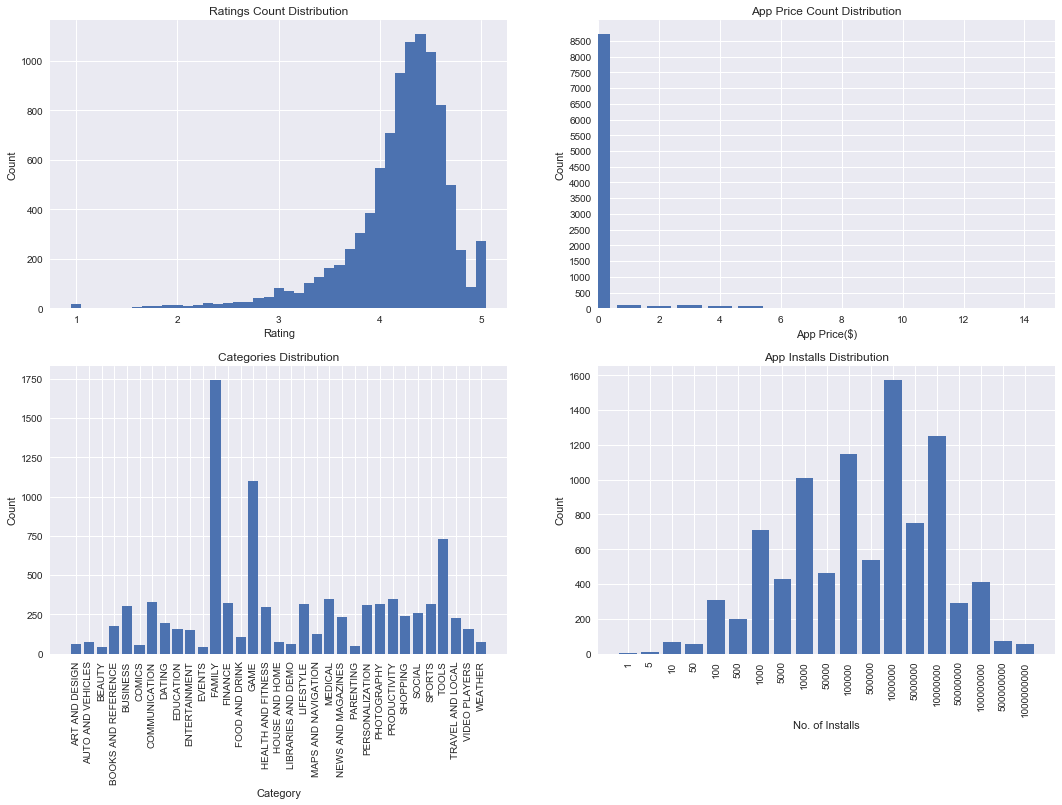

In [21]:
plt.figure(figsize=(18, 18))
plt.style.use('seaborn')

plt.subplot(3, 2, 1)
plt.bar(ratingtypes ,ratingcount, width=0.1)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings Count Distribution')

plt.subplot(3, 2, 2)
# plt.xlim(0, max(pricetypes)+1)
plt.bar(pricetypes, pricecount)
plt.xlim(0, 15)
plt.yticks(np.arange(0, max(pricecount), 500))
plt.xlabel('App Price($)')
plt.ylabel('Count')
plt.title('App Price Count Distribution')

plt.subplot(3, 2, 3)
plt.bar(cattypes ,catcount)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories Distribution')

plt.subplot(3, 2, 4)
plt.bar(insticks, inscount)
plt.xticks(insticks, instypes, rotation=90)
plt.xlabel('No. of Installs')
plt.ylabel('Count')
plt.title('App Installs Distribution')
plt.show()

### 2. Feature Correlations

##### i. Best Performing Categories (with its Genres)

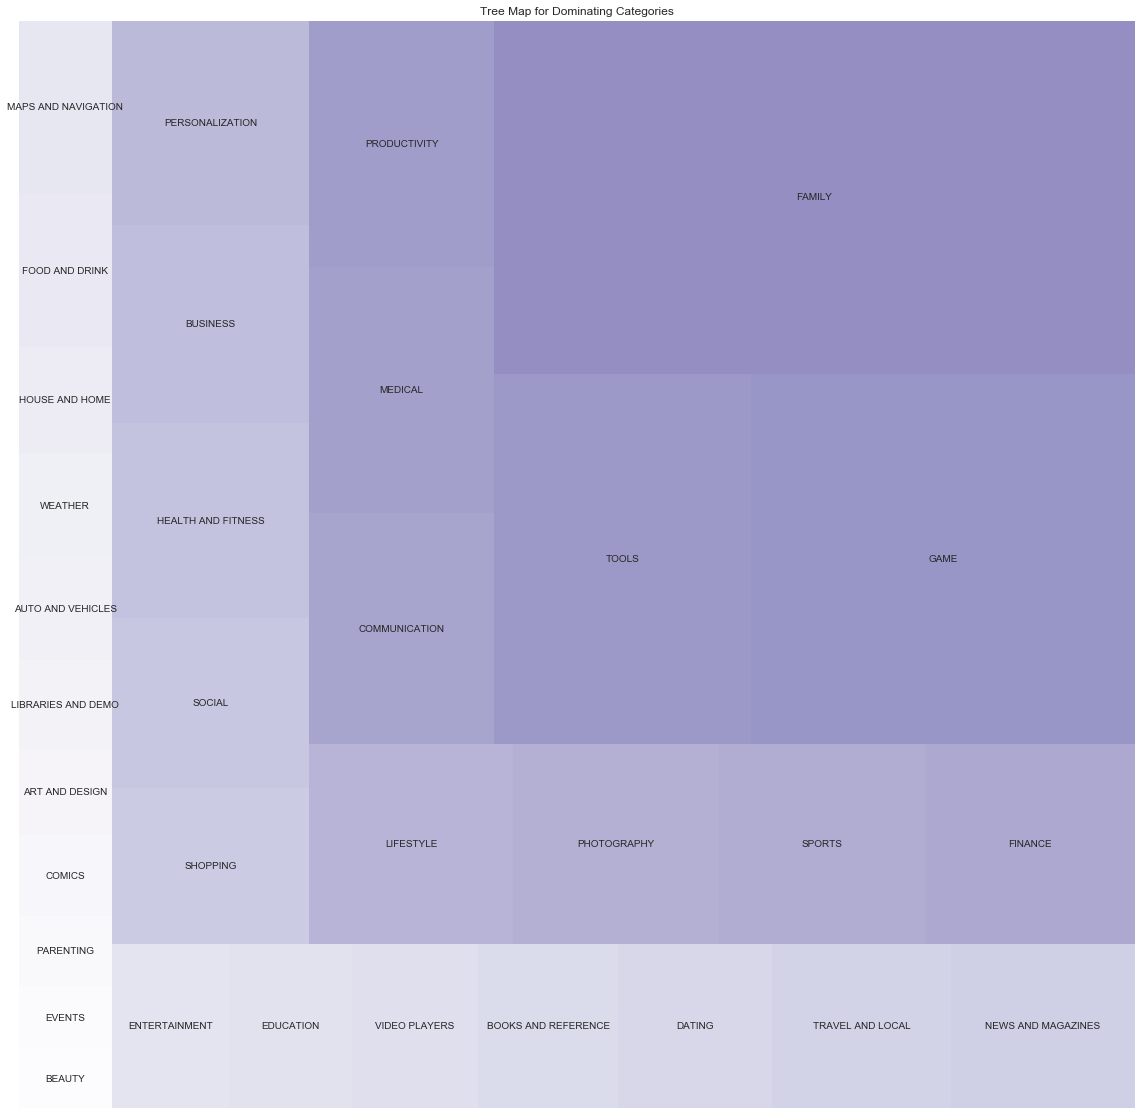

In [22]:
import squarify
plt.figure(figsize=(20,20))
color = plt.cm.Purples(np.linspace(0, 1, 50))

categories = appdf["Category"].value_counts().sort_values(ascending=True)
squarify.plot(sizes=categories.values, label=categories.index, alpha=.8, color=color)
plt.title('Tree Map for Dominating Categories')
plt.axis('off')
plt.show()

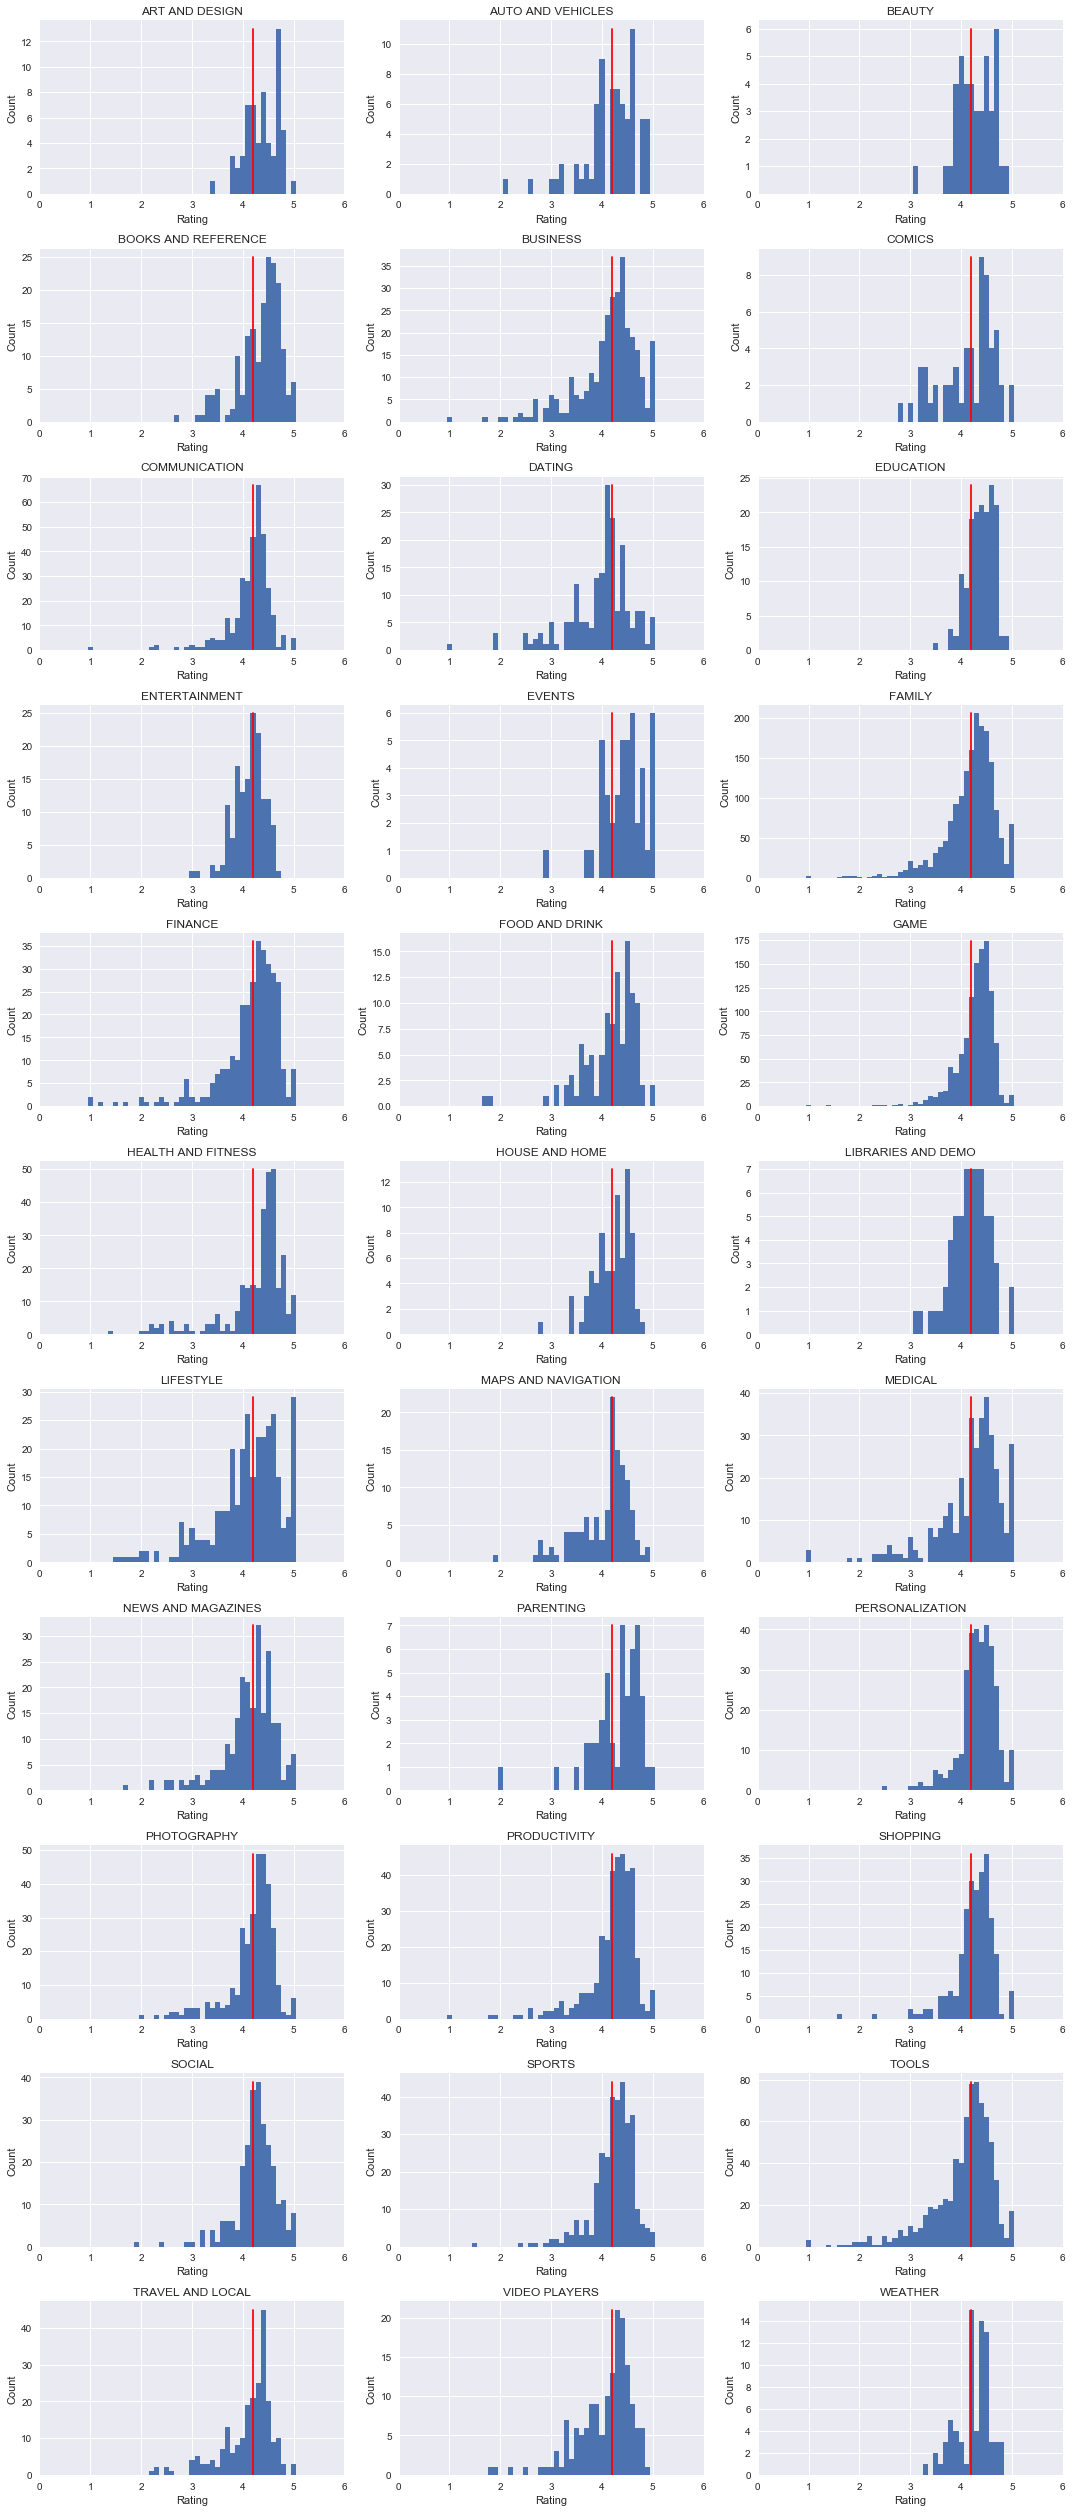

In [23]:
mean = appdf['Rating'].mean()
plt.figure(figsize=(15, 35))
for i in range(len(cattypes)):
    plt.tight_layout()
    types = appdf[appdf['Category'] == cattypes[i]].groupby('Rating').count().index.tolist()
    count = appdf[appdf['Category'] == cattypes[i]].groupby('Rating').count()['App'].tolist()    
    plt.subplot(11, 3, i+1)
    plt.plot([mean, mean], [0, max(count)], 'r-')
    plt.bar(types, count, width=0.1)
    plt.xlim(0, 6)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title(cattypes[i])
plt.show()

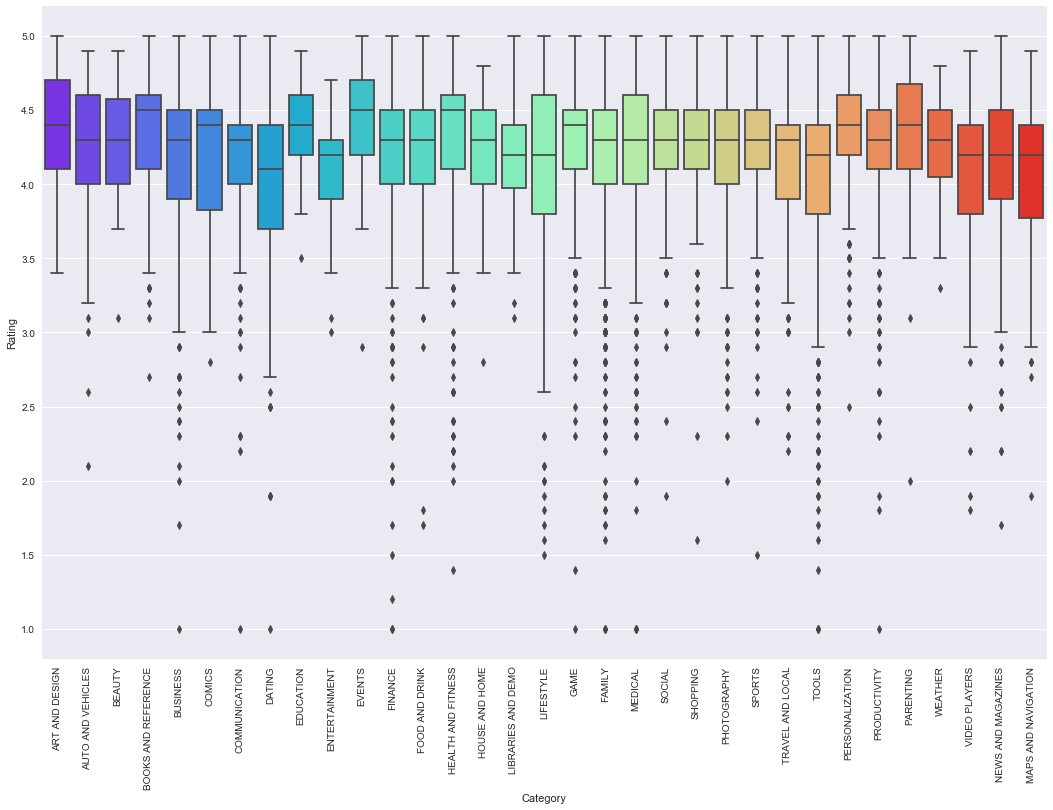

In [24]:
# Category vs Rating Box-and-Whisker
plt.figure(figsize=(18, 12))
plt.xticks(rotation=90)
sns.boxplot(x='Category',y='Rating', data=appdf, palette='rainbow')

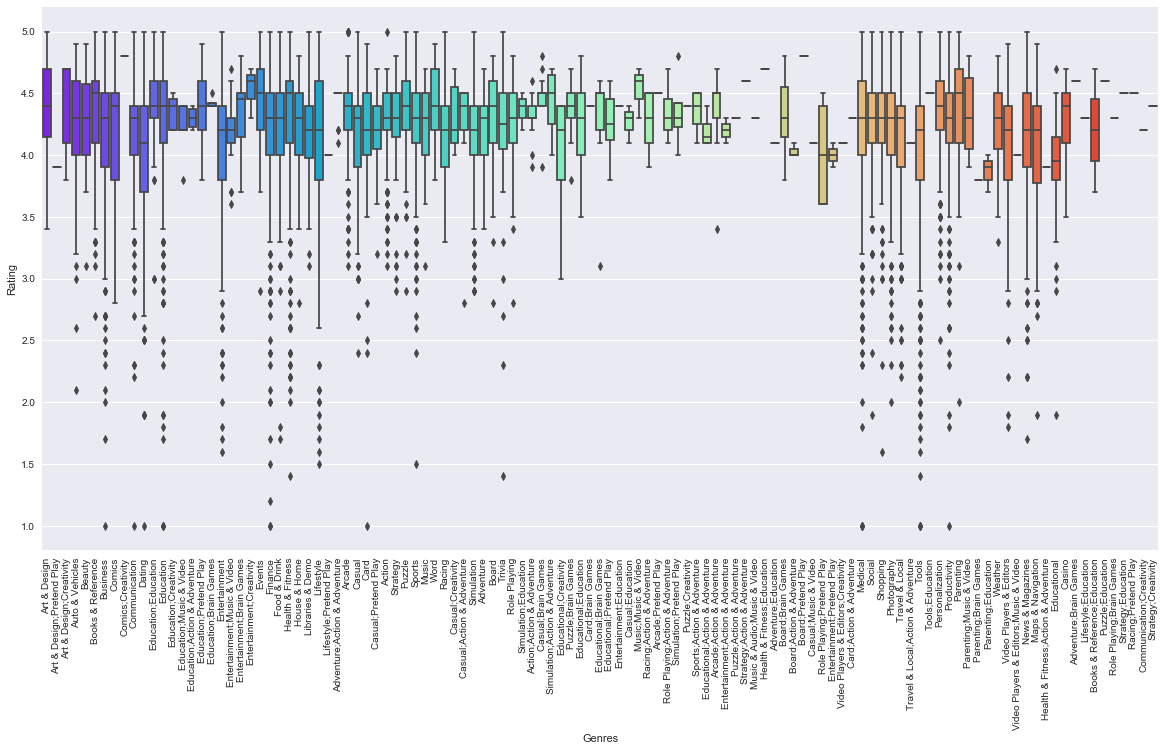

In [25]:
# Genre vs Rating Box-and-Whisker
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.boxplot(x='Genres',y='Rating', data=appdf, palette='rainbow')

##### ii. Suitable App Size

Text(0.5, 0.98, "How does an app's size affect its rating?")

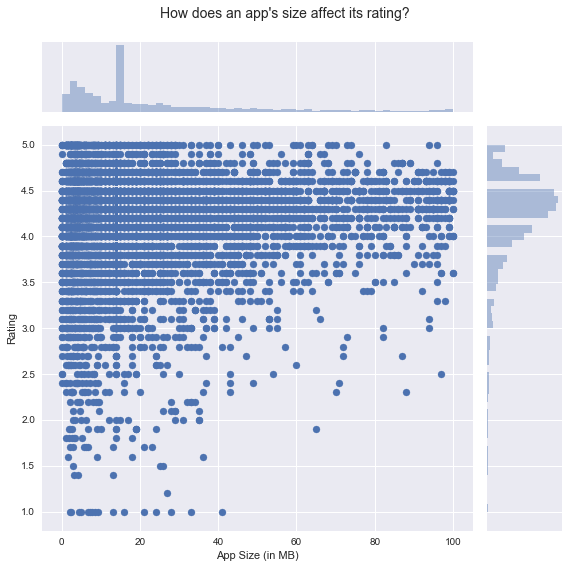

In [26]:
sns.jointplot(x='Size', y='Rating', data=appdf, height=8).set_axis_labels("App Size (in MB)","Rating")
plt.subplots_adjust(top=0.92)
plt.suptitle('How does an app\'s size affect its rating?', fontsize = 14)

Text(0.5, 0.98, "How does an app's size affect its rating?(Paid)")

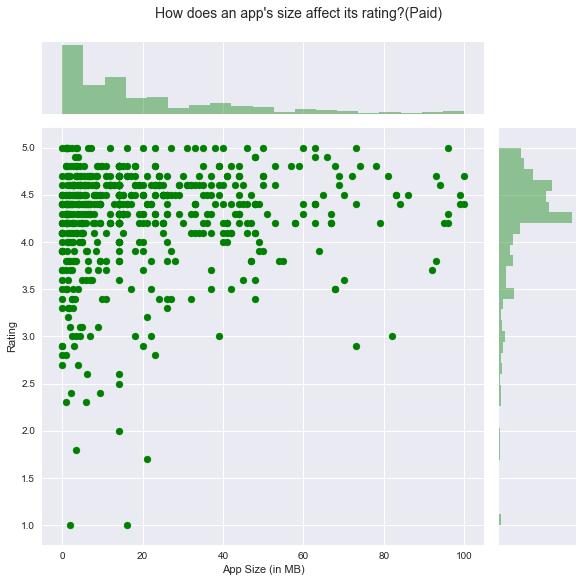

In [27]:
lst = appdf[appdf['Price'] != 0][['Size', 'Rating']].values.tolist()
sizes = []
ratings = []
for l in lst:
    sizes.append(float(l[0]))
    ratings.append(l[1])
sns.jointplot(x=sizes, y=ratings, height=8, color='green').set_axis_labels("App Size (in MB)", "Rating")
plt.subplots_adjust(top=0.92)
plt.suptitle('How does an app\'s size affect its rating?(Paid)', fontsize = 14)
# Paid users prefer lightweight apps, most likely niche, and are designed to very specific roles only
# Large sized, too vanilla paid app will not do well in the market

Text(0.5, 0.98, "How does an app's size affect its rating?(Free)")

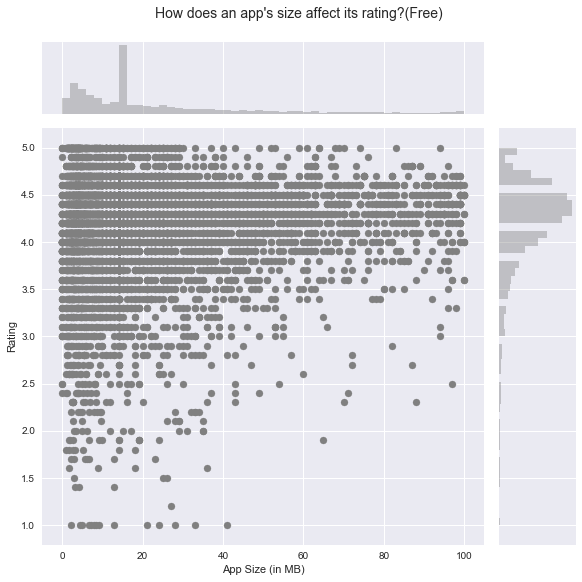

In [28]:
lst = appdf[appdf['Price'] == 0][['Size', 'Rating']].values.tolist()
sizes = []
ratings = []
for l in lst:
    sizes.append(float(l[0]))
    ratings.append(l[1])
sns.jointplot(x=sizes, y=ratings, height=8, color='grey').set_axis_labels("App Size (in MB)","Rating")
plt.subplots_adjust(top=0.92)
plt.suptitle('How does an app\'s size affect its rating?(Free)', fontsize = 14)
# Very Weak Correlation here on the other hand

##### iii. Suitable App Price

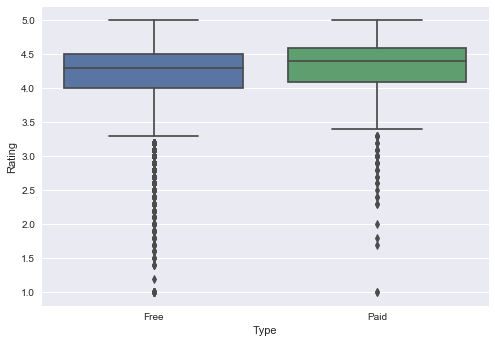

In [29]:
sns.boxplot(x='Type', y='Rating', data=appdf)

In [30]:
lst2 = appdf[['Price', 'Rating']].values.tolist()
prices = []
ratings = []

for l in lst2:
    prices.append(float(l[0]))
    ratings.append(l[1])

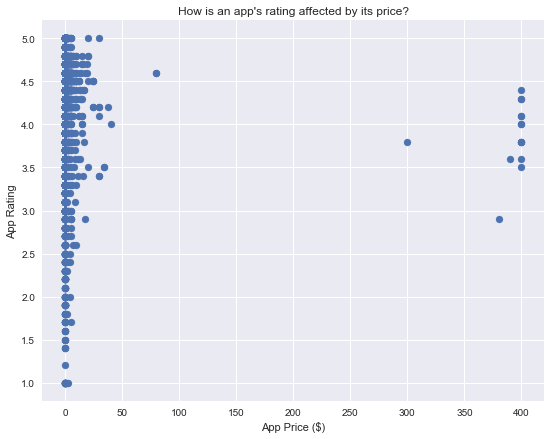

In [31]:
# plt.xlim(-1, 50)
plt.figure(figsize=(9,7))
plt.scatter(prices, ratings)
plt.xlabel('App Price ($)')
plt.ylabel('App Rating')
plt.title('How is an app\'s rating affected by its price?')
plt.show()

# Most apps are optimally priced around $0 to $30

Text(0.5, 1.0, 'Average App Price based on Categories')

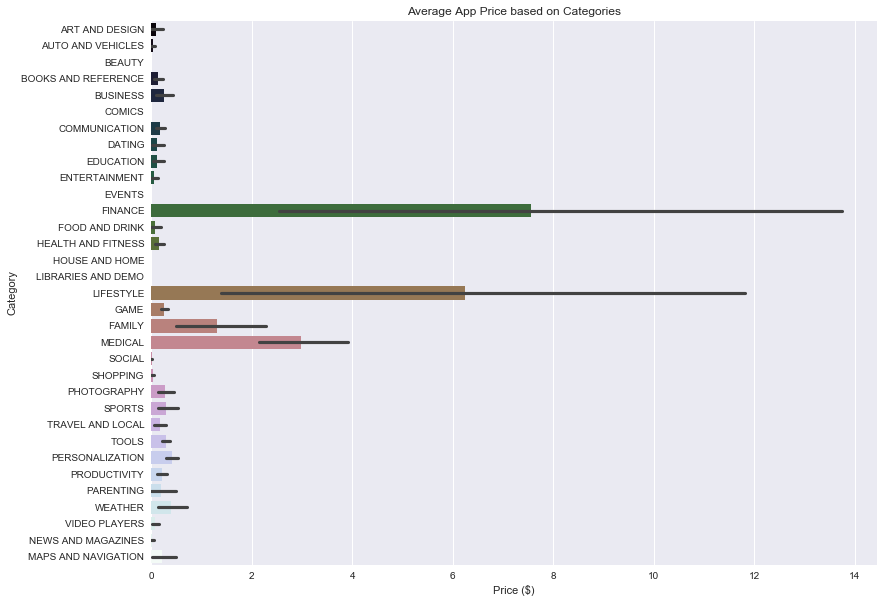

In [32]:
plt.figure(figsize=(13,10))
sns.barplot(x='Price', y='Category', data=appdf, palette='cubehelix', orient='h')
plt.xlabel('Price ($)')
plt.title('Average App Price based on Categories')

# Finance, Lifestyle and Medical apps are most expensive

##### iv. Effect of reviews

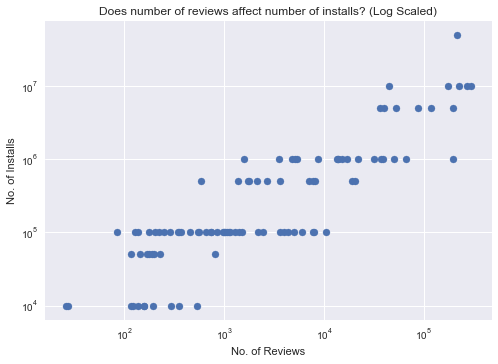

In [33]:
import collections
in_lst = appdf['Installs'].tolist()[:100]
in_lst = np.array(in_lst)
in_lst = in_lst.astype(int)
                               
re_lst = appdf['Reviews'].tolist()[:100]
re_lst = np.array(re_lst)
re_lst = re_lst.astype(int)

dct = {}
for i, r in zip(in_lst, re_lst):
    dct[r] = i


dct = dict(collections.OrderedDict(sorted(dct.items())))    

plt.xlabel('No. of Reviews')
plt.ylabel('No. of Installs')
plt.yscale('symlog')
plt.xscale('symlog')
plt.scatter(dct.keys(), dct.values())
plt.title('Does number of reviews affect number of installs? (Log Scaled)')
plt.show()

# So, users are more likely to install an app if it has been reviewed by a large amount of people
# On the other hand, this would mean active users which download an app are likely to leave a review/feedback

Text(0.5, 1.0, 'Average App Rating referring to No. of Reviews')

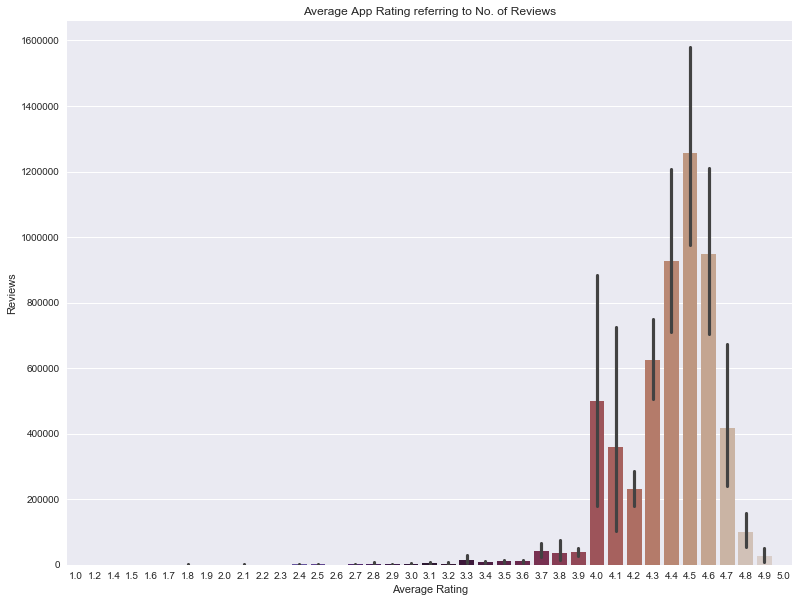

In [34]:
plt.figure(figsize=(13,10))
sns.barplot(x='Rating', y='Reviews', data=appdf, palette='twilight')
plt.xlabel('Average Rating')
plt.title('Average App Rating referring to No. of Reviews')

##### v. Best Supportive Months for Developer Support

In [35]:
appdf['Last Updated'] = appdf['Last Updated'].apply(lambda x: (''.join([i for i in x if not i.isdigit()])))
appdf['Last Updated'] = appdf['Last Updated'].apply(lambda x: x.replace(' ,', ''))

In [36]:
appdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,January,1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,January,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,August,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,June,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,June,1.1,4.4 and up


In [37]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
installdf = appdf[['Last Updated', 'Installs']]
installdf['Installs'] = label.fit_transform(installdf['Installs'])

installdf['Last Updated'] = installdf['Last Updated'].apply(lambda x: x[:3])
installdf['Last Updated'] = pd.to_datetime(installdf['Last Updated'], format='%b', errors='coerce').dt.month
installdf = installdf.sort_values(by="Last Updated")
installdf.head()

dummyInstall = appdf[['Last Updated', 'Installs']]
dummyInstall['Last Updated'] = dummyInstall['Last Updated'].apply(lambda x: x[:3])
dummyInstall['Last Updated'] = pd.to_datetime(dummyInstall['Last Updated'], format='%b', errors='coerce').dt.month
dummyInstall = dummyInstall.sort_values(by="Last Updated")
dummyInstall.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

,Last Updated,Installs
0,1,10000
5230,1,100
7823,1,5000
7820,1,10000
5133,1,1000


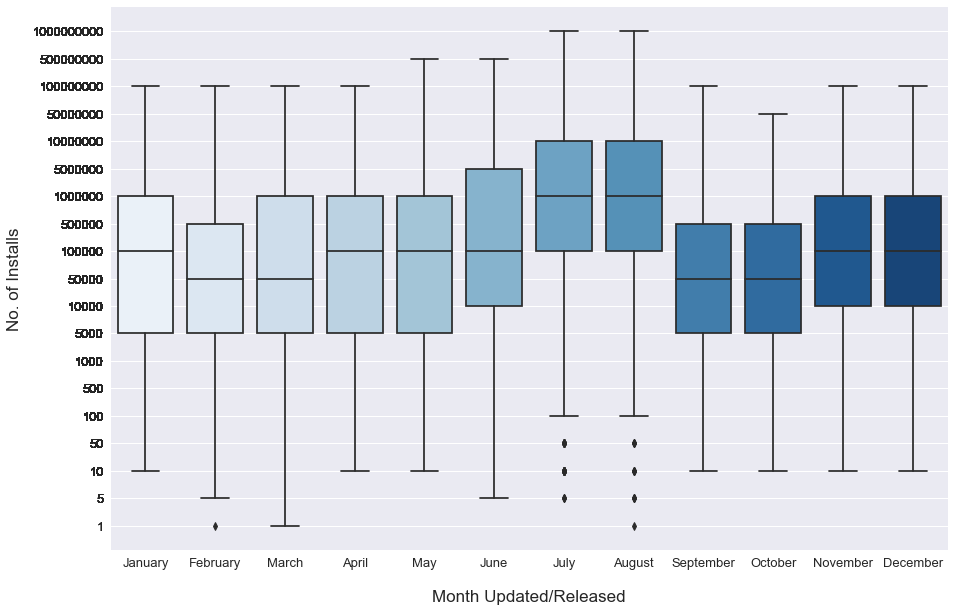

In [38]:
# Based on Last Updated/Released
months = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
installs = appdf['Installs'].unique().tolist()
installs.sort()

plt.figure(figsize=(15,10))

plt.yticks(installdf['Installs'], dummyInstall['Installs'])
plt.ylabel('', labelpad=10, fontsize=17)
plt.xlabel('', labelpad=20, fontsize=17)

ax = sns.boxplot(x='Last Updated', y='Installs', data=installdf, palette='Blues', orient='v')
ax.tick_params(labelsize=13)
ax.set_xticklabels(labels=months)
ax.set(xlabel='Month Updated/Released', ylabel='No. of Installs')
plt.show()

In [39]:
reviewdf = appdf[['Last Updated', 'Reviews']]
reviewdf['Reviews'] = label.fit_transform(reviewdf['Reviews'])

reviewdf['Last Updated'] = reviewdf['Last Updated'].apply(lambda x: x[:3])
reviewdf['Last Updated'] = pd.to_datetime(reviewdf['Last Updated'], format='%b', errors='coerce').dt.month
reviewdf = reviewdf.sort_values(by="Last Updated")
reviewdf.head()

# dummyReview = appdf[['Last Updated', 'Reviews']]
# dummyInstall['Last Updated'] = dummyInstall['Last Updated'].apply(lambda x: x[:3])
# dummyInstall['Last Updated'] = pd.to_datetime(dummyInstall['Last Updated'], format='%b', errors='coerce').dt.month
# dummyInstall = dummyInstall.sort_values(by="Last Updated")
# dummyInstall.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

,Last Updated,Reviews
0,1,158
5230,1,43
7823,1,32
7820,1,124
5133,1,4


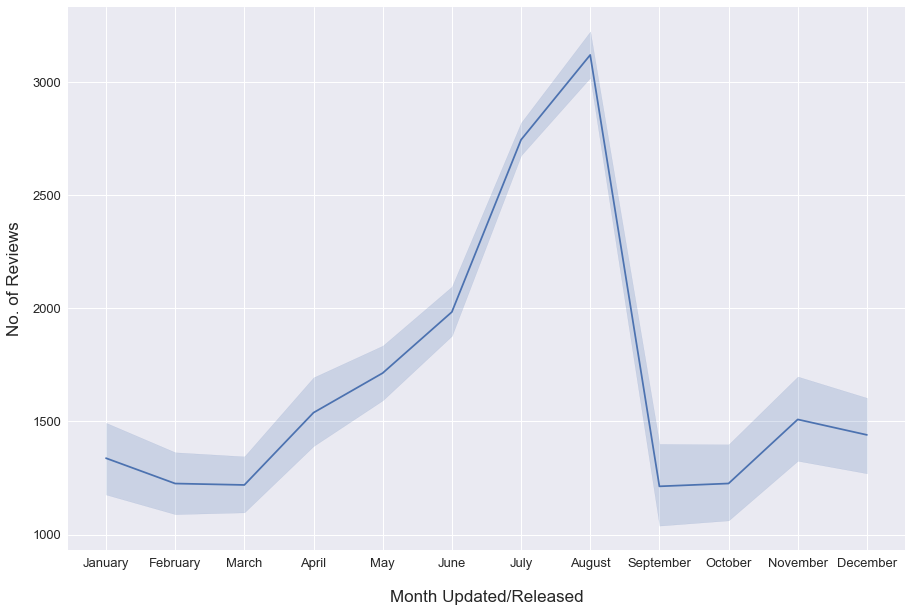

In [40]:
# Based on Last Updated/Released
months = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
# installs = appdf['Installs'].unique().tolist()
# installs.sort()

plt.figure(figsize=(15,10))

# plt.yticks(installdf['Installs'], dummyInstall['Installs'])
plt.ylabel('', labelpad=10, fontsize=17)
plt.xlabel('', labelpad=20, fontsize=17)

ax = sns.lineplot(x='Last Updated', y='Reviews', data=reviewdf)
ax.tick_params(labelsize=13)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=months)
ax.set(xlabel='Month Updated/Released', ylabel='No. of Reviews')
plt.show()

# Thus, apps and updates are well received in months July-August

##### vi. Android Version Support

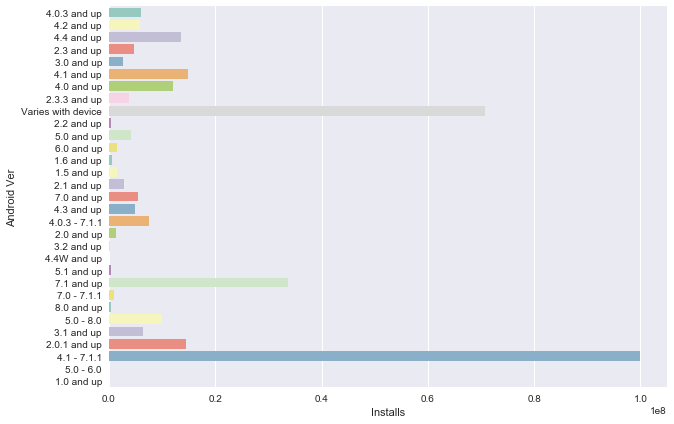

In [41]:
plt.figure(figsize=(10,7))
# plt.xticks(rotation=90)
sns.barplot(x='Installs', y='Android Ver', data=appdf, palette="Set3", ci=None, orient='h')

##### vii. Effect of Content Rating

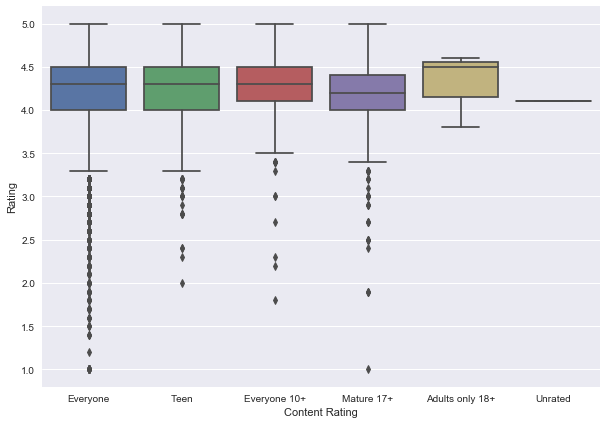

In [42]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Content Rating', y='Rating', data=appdf)

In [43]:
appdf[appdf['Content Rating'] == 'Adults only 18+'].groupby('Category')['App']

In [44]:
appdf[appdf['Content Rating'] == 'Adults only 18+'].groupby('Category')['App'].count().tolist()

[2, 1]

In [45]:
# df.groupby(['Symbol','Year']).count().unstack(fill_value=0).stack()
appdf[appdf['Content Rating'] == 'Adults only 18+'].groupby('Category')['App'].value_counts().unstack(fill_value=0).stack()
print(len(appdf[appdf['Content Rating'] == 'Everyone'].groupby('Category')['App'].count().tolist()))
print(len(appdf[appdf['Content Rating'] == 'Everyone 10+'].groupby('Category')['App'].count().tolist()))
print(len(appdf[appdf['Content Rating'] == 'Mature 17+'].groupby('Category')['App'].count().tolist()))
print(len(appdf[appdf['Content Rating'] == 'Teen'].groupby('Category')['App'].count().tolist()))

33
20
25
32


In [46]:
pivotdf = appdf.pivot_table(index='Category', 
                     columns='Content Rating', 
                     values='App',
                     fill_value=0, 
                     aggfunc='count').unstack()

In [47]:
appdf[appdf['Content Rating'] == 'Adults only 18+'].groupby('Category')['App'].count()

Category
COMICS    2
SPORTS    1
Name: App, dtype: int64

In [48]:
pivotdf.loc['Adults only 18+']

Category
ART AND DESIGN         0
AUTO AND VEHICLES      0
BEAUTY                 0
BOOKS AND REFERENCE    0
BUSINESS               0
COMICS                 2
COMMUNICATION          0
DATING                 0
EDUCATION              0
ENTERTAINMENT          0
EVENTS                 0
FAMILY                 0
FINANCE                0
FOOD AND DRINK         0
GAME                   0
HEALTH AND FITNESS     0
HOUSE AND HOME         0
LIBRARIES AND DEMO     0
LIFESTYLE              0
MAPS AND NAVIGATION    0
MEDICAL                0
NEWS AND MAGAZINES     0
PARENTING              0
PERSONALIZATION        0
PHOTOGRAPHY            0
PRODUCTIVITY           0
SHOPPING               0
SOCIAL                 0
SPORTS                 1
TOOLS                  0
TRAVEL AND LOCAL       0
VIDEO PLAYERS          0
WEATHER                0
dtype: int64

In [49]:
adultsOnly = pivotdf.loc['Adults only 18+']
everyOne = pivotdf.loc['Everyone']
tenPlus = pivotdf.loc['Everyone 10+']
mature = pivotdf.loc['Mature 17+']
teen = pivotdf.loc['Teen']
scaleAdults = []
scaleEvery = []
scaleTen = []
scaleMature = []
scaleTeen = []
    
scaleAdults = np.array(adultsOnly)
scaleEvery = np.array(everyOne)
scaleTen = np.array(tenPlus)
scaleMature = np.array(mature)
scaleTeen = np.array(teen)

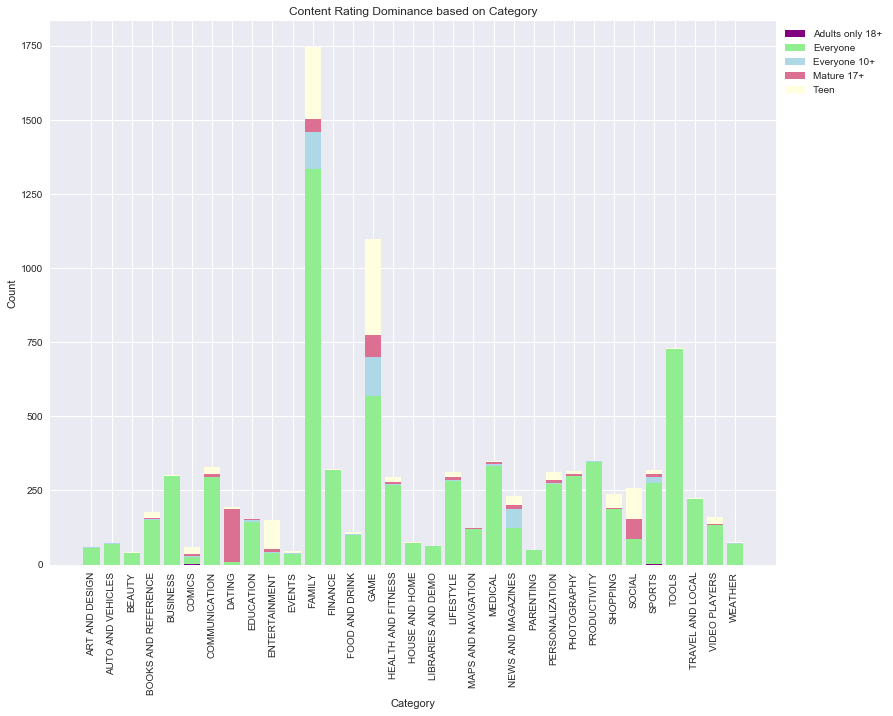

In [50]:
catTypes = appdf.groupby('Category').count().index.tolist()
plt.figure(figsize=(13,10))

p1 = plt.bar(catTypes, adultsOnly, color= 'purple')
p2 = plt.bar(catTypes, everyOne, bottom=scaleAdults, color='lightgreen')
p3 = plt.bar(catTypes, tenPlus, bottom=[i+j for i,j in zip(scaleAdults, scaleEvery)], color='lightblue')
p4 = plt.bar(catTypes, mature, bottom=[i+j+k for i,j,k in zip(scaleAdults, scaleEvery, scaleTen)], color='#DB7093')
p5 = plt.bar(catTypes, teen, bottom=[i+j+k+l for i,j,k,l in zip(scaleAdults, scaleEvery, scaleTen, scaleMature)], color='lightyellow')

plt.legend(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen'], loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.title('Content Rating Dominance based on Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

##### viii. Bandwagon Effect

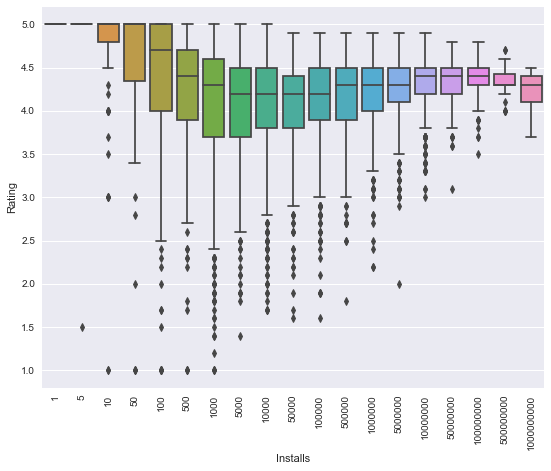

In [51]:
plt.figure(figsize=(9,7))
plt.xticks(rotation=90)
sns.boxplot(x='Installs', y='Rating', data=appdf)

##### ix. Correlation

In [52]:
corrdf = appdf.drop(['App'], axis=1)

In [53]:
corrdf['Category'] = corrdf['Category'].astype('category').cat.codes
corrdf['Genres'] = corrdf['Genres'].astype('category').cat.codes
corrdf['Type'] = corrdf['Type'].astype('category').cat.codes
corrdf['Content Rating'] = corrdf['Content Rating'].astype('category').cat.codes
corrdf.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,159,19.0,10000,0,0.0,1,9,January,1.0.0,4.0.3 and up
1,0,3.9,967,14.0,500000,0,0.0,1,11,January,2.0.0,4.0.3 and up
2,0,4.7,87510,8.7,5000000,0,0.0,1,9,August,1.2.4,4.0.3 and up
3,0,4.5,215644,25.0,50000000,0,0.0,4,9,June,Varies with device,4.2 and up
4,0,4.3,967,2.8,100000,0,0.0,1,10,June,1.1,4.4 and up


##### x. User Sentimental Analysis

In [54]:
userdf = pd.read_csv('googleplaystore_user_reviews.csv')
userdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [55]:
userdf.dropna(inplace=True)

In [56]:
dfFinal = userdf.merge(appdf, on='App', how='inner')
dfFinal.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH AND FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,February,1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH AND FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,February,1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH AND FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,February,1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH AND FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,February,1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH AND FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,February,1.9,2.3.3 and up


In [57]:
positive = dfFinal[dfFinal['Sentiment'] == 'Positive'].groupby('Category')['Sentiment'].count().tolist()
neutral = dfFinal[dfFinal['Sentiment'] == 'Neutral'].groupby('Category')['Sentiment'].count().tolist()
negative = dfFinal[dfFinal['Sentiment'] == 'Negative'].groupby('Category')['Sentiment'].count().tolist()

scalepos = []
scaleneu = []
scaleneg = []
for i, j, k in zip(positive, neutral, negative):
    newi = i/(i+j+k) * 100 
    newj = j/(i+j+k) * 100
    newk = k/(i+j+k) * 100
    scalepos.append(newi)
    scaleneu.append(newj)
    scaleneg.append(newk)


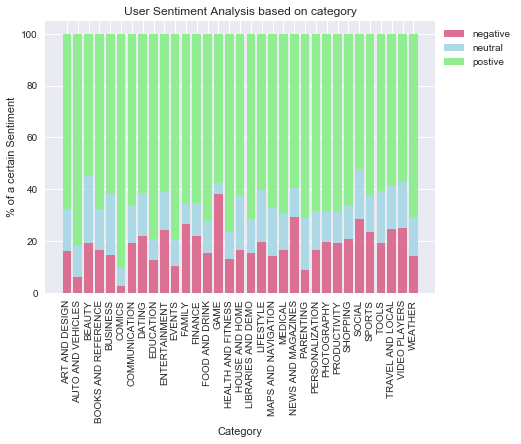

In [58]:
plt.figure(figsize=(7,5))

p1 = plt.bar(cattypes, scaleneg, color= '#DB7093')
p2 = plt.bar(cattypes, scaleneu, bottom=scaleneg, color='lightblue')
p3 = plt.bar(cattypes, scalepos, bottom=[i+j for i,j in zip(scaleneg, scaleneu)], color='lightgreen')

plt.legend(['negative', 'neutral', 'postive'], loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.title('User Sentiment Analysis based on category')
plt.xlabel('Category')
plt.ylabel('% of a certain Sentiment')
plt.show()

# Comic apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.

In [59]:
positive = dfFinal[dfFinal['Sentiment'] == 'Positive'].groupby('Type')['Sentiment'].count().tolist()
neutral = dfFinal[dfFinal['Sentiment'] == 'Neutral'].groupby('Type')['Sentiment'].count().tolist()
negative = dfFinal[dfFinal['Sentiment'] == 'Negative'].groupby('Type')['Sentiment'].count().tolist()

scalepos = []
scaleneu = []
scaleneg = []
for i, j, k in zip(positive, neutral, negative):
    newi = i/(i+j+k) * 100 
    newj = j/(i+j+k) * 100
    newk = k/(i+j+k) * 100
    scalepos.append(newi)
    scaleneu.append(newj)
    scaleneg.append(newk)

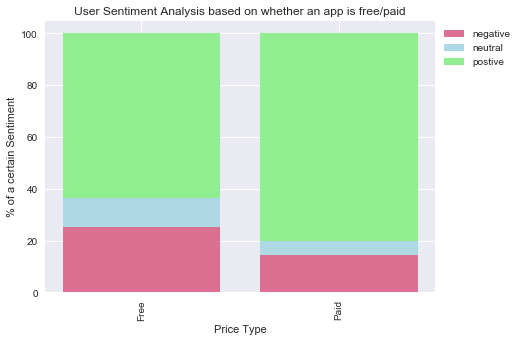

In [60]:
pricetypes = appdf.groupby('Type').count().index.tolist()
plt.figure(figsize=(7,5))

p1 = plt.bar(pricetypes, scaleneg, color= '#DB7093')
p2 = plt.bar(pricetypes, scaleneu, bottom=scaleneg, color='lightblue')
p3 = plt.bar(pricetypes, scalepos, bottom=[i+j for i,j in zip(scaleneg, scaleneu)], color='lightgreen')

plt.legend(['negative', 'neutral', 'postive'], loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.title('User Sentiment Analysis based on whether an app is free/paid')
plt.xlabel('Price Type')
plt.ylabel('% of a certain Sentiment')
plt.show()

# Users are more critical and harsh when reviewing free apps compared to paid apps

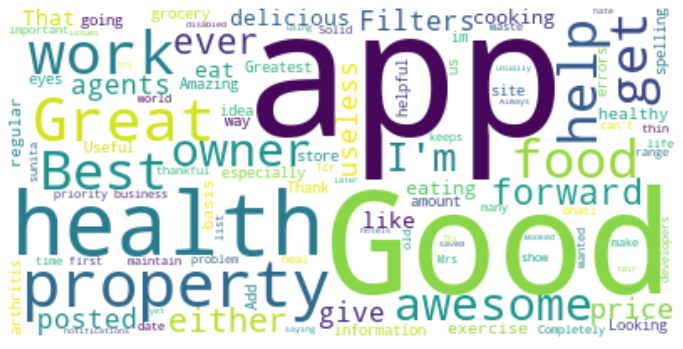

In [61]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white", max_words=100, colormap="viridis", stopwords=stopwords.words("english"))
plt.imshow(wc.generate_from_text(str(dfFinal["Translated_Review"])), interpolation="bilinear");
plt.axis("off");

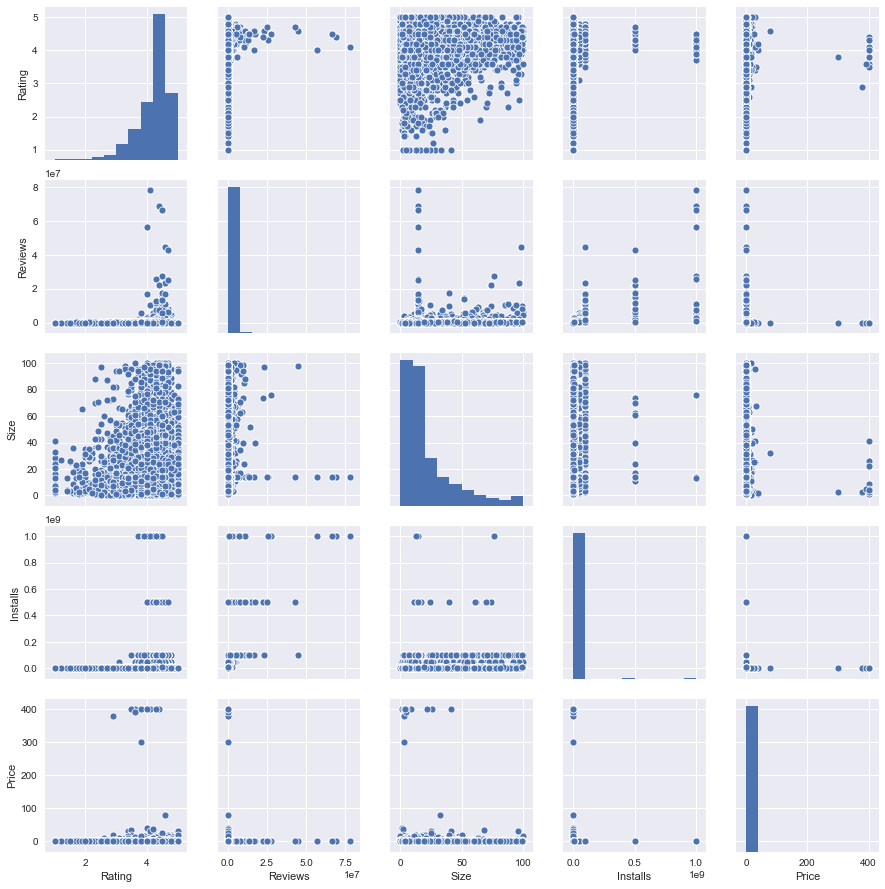

In [62]:
sns.pairplot(appdf)

### EDA Conclusions

##### -Nilai Rating rata-rata aplikasi (aktif) di Google Play Store adalah 4.19.
##### -Pengguna lebih suka membayar aplikasi yang berbobot ringan. Dengan demikian, aplikasi berbayar yang berat mungkin tidak berkinerja baik di pasar.
##### -Ini berarti aplikasi niche yang hanya menyediakan satu tujuan tertentu akan berperforma lebih baik di pasar daripada aplikasi bersifat jack-of-all trade.
##### -Sebagian besar aplikasi berperingkat teratas berukuran optimal antara ~ 2MB hingga ~ 40MB - tidak terlalu ringan atau terlalu berat.
##### -Sebagian besar aplikasi berperingkat teratas dihargai secara optimal antara ~ 1 hingga ~ 30 dolar - tidak terlalu murah atau terlalu mahal.
##### - Aplikasi Medis dan Keluarga adalah yang paling mahal dan bahkan mencapai hingga $ 80.
##### -Pengguna cenderung mengunduh aplikasi yang diberikan lebih banyak jika telah ditinjau oleh banyak orang.
##### -Vice Versa, aplikasi dengan pemasangan tinggi kemungkinan akan memiliki lebih banyak pengguna aktif yang lebih banyak memberi ulasan.
##### - Aplikasi Kesehatan dan Kebugaran menerima lebih dari 80% ulasan positif. Aplikasi Game dan Sosial menerima umpan balik campuran - 50% positif dan 50% negatif.
##### -Pengguna lebih kritis dan keras saat meninjau aplikasi gratis daripada aplikasi berbayar.
##### -Keluarga, Alat dan Kategori Game adalah yang paling banyak ditemukan di market.
##### -Sementara itu, Aplikasi Buku dan Kebugaran menerima peringkat rata-rata terbaik dan kebanyakan sentimen positif.
##### -Waktu terbaik bagi pengembang untuk merilis aplikasi atau update pada bulan Juli dan Agustus.
##### -Aplikasi yang ideal harus mendukung android ver 4.1-7.1.1.
##### -Konten Rating Dewasa 18+ memiliki rating lebih tinggi sementara aplikasi dengan content rating Mature 17+ menerima ulasan yang lebih buruk secara rata-rata.
##### -Kebanyakan Content Reating didominasi oleh 'Semua Orang', kecuali untuk Kencan yang sebagian besar Mature 17+.
##### -Korelasi yang baik antara jumlah total unduh dan rating hingga 10 juta unduhan, dimana keinginan user menjadi terlalu variatif dan subjektif sehingga hubungan proporsional melemah.

# Machine learning to Predict App Rating

### Converting Categorical String Values

In [63]:
appdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,January,1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,January,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,August,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,June,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,June,1.1,4.4 and up


##### Pre-Encoding Measures

In [64]:
# Converting month to numeric values, sorting the dataframe based on datetime to reduce confusion and complexity
appdf['Last Updated'] = appdf['Last Updated'].apply(lambda x: x[:3])
appdf['Last Updated'] = pd.to_datetime(appdf['Last Updated'], format='%b', errors='coerce').dt.month
appdf = appdf.sort_values(by="Last Updated")
appdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1,1.0.0,4.0.3 and up
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2.8,100,Free,0.0,Everyone,Photography,1,1.0,4.1 and up
7823,CS Interview Questions (TechQ),FAMILY,4.8,33,6.7,5000,Free,0.0,Everyone,Education,1,1.5,4.1 and up
7820,NetClient CS,BUSINESS,3.5,125,4.3,10000,Free,0.0,Everyone,Business,1,1.2.2,3.0 and up
5133,AH Connect (Adventist Health),HEALTH AND FITNESS,3.4,5,59.0,1000,Free,0.0,Everyone,Health & Fitness,1,3.5.1,4.4 and up


In [65]:
appdf.to_csv('newGApp.csv', index=False)

In [66]:
# Rounding App Current Ver
appdf['Current Ver'] = appdf['Current Ver'].apply(lambda x: x[0])
# appdf[appdf['Current Ver'] == 'V'] = appdf[appdf['Current Ver'] == 'V'].apply(lambda x: )

In [67]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
modeldf = appdf.drop(['App', 'Reviews', 'Installs'], axis=1)
modeldf['Category'] = label.fit_transform(modeldf['Category'])
modeldf['Type'] = label.fit_transform(modeldf['Type'])
modeldf['Content Rating'] = label.fit_transform(modeldf['Content Rating'])
modeldf['Genres'] = label.fit_transform(modeldf['Genres'])
modeldf['Current Ver'] = label.fit_transform(modeldf['Current Ver'])
modeldf['Android Ver'] = label.fit_transform(modeldf['Android Ver'])


modeldf.head()

,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,4.1,19.0,0,0.0,1,9,1,1,14
5230,24,5.0,2.8,0,0.0,1,79,1,1,16
7823,11,4.8,6.7,0,0.0,1,37,1,1,16
7820,4,3.5,4.3,0,0.0,1,20,1,1,9
5133,15,3.4,59.0,0,0.0,1,60,1,3,19


In [68]:
appdf.count()

App               9360
Category          9360
Rating            9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [69]:
# Rounding Down Rating as whole number estimation should be enough
modeldf['Rating'] = modeldf['Rating'].apply(lambda x: int(x))

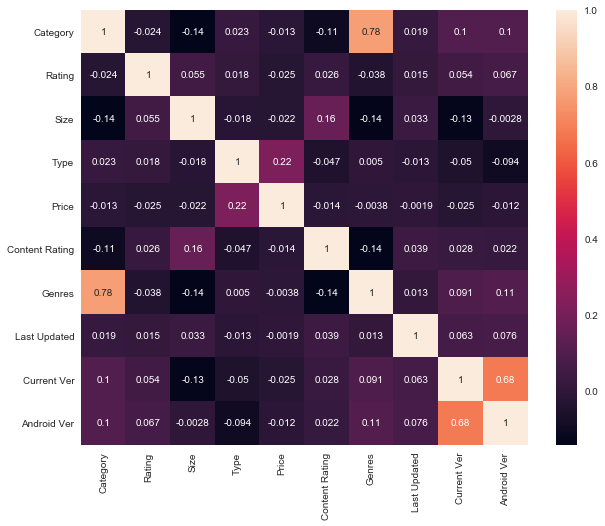

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(modeldf.corr(), annot=True)

### Splitting Datasets

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(modeldf.drop(['Rating'], axis=1), modeldf['Rating'], test_size=.30, random_state=19)

### Training and Selecting Models

##### 1. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='lbfgs', max_iter=100000, multi_class='auto')
modelLR.fit(X_train, y_train)
modelLR.score(X_train, y_train) * 100

75.53418803418803

##### 2. KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

def nilai_k():
    k = round((len(X_train)+len(X_test)) ** .2)
    if k % 2 == 0:
        return k + 1
    else:
        return k
    
modelKN = KNeighborsClassifier(n_neighbors=nilai_k())
modelKN.fit(X_train, y_train)
modelKN.score(X_train, y_train) * 100

77.68620268620269

##### 3. RandomForestClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100)
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train) * 100

98.68742368742369

In [75]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [76]:
#### Model Comparison with Cross validation
from sklearn.model_selection import cross_val_score

nilaiLR = np.mean(cross_val_score(modelLR, X_test, y_test, cv=5, scoring='accuracy')) * 100 
nilaiKN = np.mean(cross_val_score(modelKN, X_test, y_test, cv=5, scoring='accuracy')) * 100 
nilaiRF = np.mean(cross_val_score(modelRF, X_test, y_test, cv=5, scoring='accuracy')) * 100 
print(
    f'Logistic Regression score: {nilaiLR}%\nKNeighborsClassifier score: {nilaiKN}%\nRandomForestClassifier score: {nilaiRF}%'
)

Logistic Regression score: 76.21127002257774%
KNeighborsClassifier score: 74.28650768456643%
RandomForestClassifier score: 74.71526355746288%


### GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
optimized = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100),
                     param_grid = {
                         'n_estimators': [100, 200, 300, 500],
                         'bootstrap': [True, False],
                         'min_samples_split': [2, 5, 10, 20],
                     }, scoring = 'accuracy',
                     cv = 5,
                     n_jobs = -1)
optimized.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [78]:
optimized.best_params_

{'bootstrap': True, 'min_samples_split': 10, 'n_estimators': 500}

In [79]:
optimized.best_score_

0.75503663003663

In [80]:
modelRF = optimized.best_estimator_

### Dealing with Imbalance

In [81]:
y_train.value_counts()

4    4950
3    1189
5     203
2     166
1      44
Name: Rating, dtype: int64

In [82]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(X_train, y_train)
X_ros = pd.DataFrame(X_ros, columns=X_train.columns)
y_ros = pd.Series(y_ros)

In [83]:
y_ros.value_counts()

5    4950
4    4950
3    4950
2    4950
1    4950
dtype: int64

In [84]:
modelRF.fit(X_ros, y_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Evaluation

#### Train Error

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score
trainPredictions = modelRF.predict(X_train)
trainPredictions

array([4, 3, 4, ..., 4, 4, 3], dtype=int64)

In [86]:
con = pd.DataFrame(data=confusion_matrix(y_train, trainPredictions), columns=['1', '2', '3', '4', '5'], index=['1', '2', '3', '4', '5']);
print(con)

    1    2     3     4    5
1  44    0     0     0    0
2   1  165     0     0    0
3   0    8  1123    57    1
4   0   19   160  4770    1
5   0    0     0     0  203


In [87]:
print(classification_report(y_train,trainPredictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        44
           2       0.86      0.99      0.92       166
           3       0.88      0.94      0.91      1189
           4       0.99      0.96      0.98      4950
           5       0.99      1.00      1.00       203

    accuracy                           0.96      6552
   macro avg       0.94      0.98      0.96      6552
weighted avg       0.96      0.96      0.96      6552



In [88]:
print('Accuracy : ' + str(accuracy_score(y_train,trainPredictions)))

Accuracy : 0.9623015873015873


In [89]:
predictProbTrain = modelRF.predict_proba(X_train)
predictProbTrain

array([[0.        , 0.058     , 0.22817288, 0.71182712, 0.002     ],
       [0.        , 0.        , 0.77599533, 0.22400467, 0.        ],
       [0.        , 0.198     , 0.31677909, 0.47922091, 0.006     ],
       ...,
       [0.        , 0.        , 0.07077205, 0.92922795, 0.        ],
       [0.        , 0.042     , 0.34958398, 0.60441602, 0.004     ],
       [0.        , 0.        , 0.58170967, 0.41029033, 0.008     ]])

In [90]:
log_loss(y_train, predictProbTrain)

0.2666565024740751

#### Test Error

In [91]:
testPredictions = modelRF.predict(X_test)
testPredictions

array([3, 4, 4, ..., 4, 4, 4], dtype=int64)

In [92]:
con = pd.DataFrame(data=confusion_matrix(y_test, testPredictions), columns=['1', '2', '3', '4', '5'], index=['1', '2', '3', '4', '5']);
print(con)

   1   2    3     4   5
1  1   1    1     8   1
2  1   7   17    40   0
3  1   9  180   327   4
4  7  30  250  1825  27
5  1   0   10    52   8


In [93]:
print(classification_report(y_test, testPredictions))

              precision    recall  f1-score   support

           1       0.09      0.08      0.09        12
           2       0.15      0.11      0.12        65
           3       0.39      0.35      0.37       521
           4       0.81      0.85      0.83      2139
           5       0.20      0.11      0.14        71

    accuracy                           0.72      2808
   macro avg       0.33      0.30      0.31      2808
weighted avg       0.70      0.72      0.71      2808



In [94]:
print('Accuracy : ' + str(accuracy_score(y_test,testPredictions)))

Accuracy : 0.7197293447293447


In [95]:
predictProbTest = modelRF.predict_proba(X_test)
predictProbTest

array([[0.014     , 0.032     , 0.49728031, 0.44471969, 0.012     ],
       [0.        , 0.        , 0.12378352, 0.87621648, 0.        ],
       [0.008     , 0.006     , 0.1912183 , 0.7847817 , 0.01      ],
       ...,
       [0.        , 0.        , 0.20823942, 0.72060387, 0.07115671],
       [0.        , 0.056     , 0.21311384, 0.69306797, 0.03781818],
       [0.        , 0.        , 0.16096134, 0.83903866, 0.        ]])

In [96]:
log_loss(y_test, predictProbTest)

0.9440179244363966

#### Learning Curve

In [97]:
data = modeldf.drop(['Rating'], axis=1)
target = modeldf['Rating']

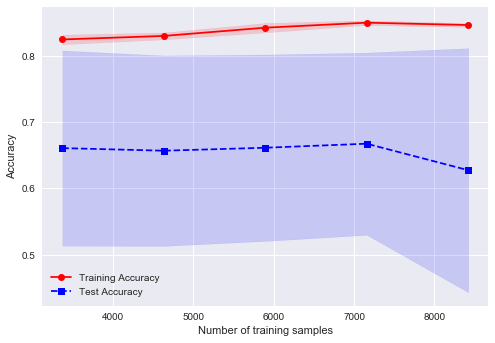

In [98]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=modelRF,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.4, 1.0, 5),
                                                       cv=10,
                                                       scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### KFold

In [99]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    logloss = log_loss(y_train,predictProba)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'accuracy': accuracy,
        'logloss': logloss
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    logloss = log_loss(y_test,predictProba)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'accuracy': accuracy,
        'logloss': logloss
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [100]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True)

In [101]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    print(len(X_val), (len(X_train) + len(X_val)))
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, modelRF)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


936 9360


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
# train_errors

In [103]:
# validation_errors

In [104]:
listItem = []

for tr,val in zip(train_errors,validation_errors) :
    listItem.append([tr['accuracy'],val['accuracy'] ,tr['f1'],val['f1'],
                     tr['logloss'],val['logloss']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Log Loss',
                            'Test Log Loss'])
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.844967,0.763889,0.389263,0.217780,0.377736,0.667216
1,0.847341,0.745726,0.383994,0.199245,0.373535,0.730470
2,0.843424,0.783120,0.378346,0.226184,0.380123,0.644258
3,0.844967,0.774573,0.356793,0.245913,0.376327,0.734732
4,0.844255,0.754274,0.377929,0.267905,0.376406,0.710202
5,0.844017,0.761752,0.374214,0.201075,0.376064,0.752949
6,0.842236,0.771368,0.358734,0.229115,0.376473,0.694011
7,0.844492,0.740385,0.383736,0.196473,0.376542,0.685794
8,0.842593,0.757479,0.375027,0.208608,0.375467,0.759643
9,0.841049,0.772436,0.375411,0.214342,0.378511,0.716871


#### Feature Importance

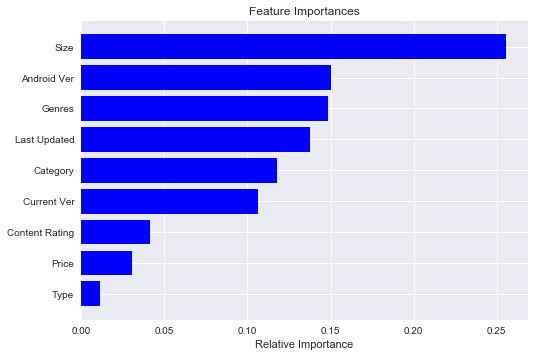

In [105]:
features = modeldf.drop(['Rating'], axis=1).columns
importances = modelRF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model Export

In [106]:
import joblib

joblib.dump(modelRF, 'RatingPredictionModel')

['RatingPredictionModel']